# Computer Vision I (922 U0610) - Homework I
Author: alanhc

ID: r10944007

Date: 9/30

## README
0. create env: `conda env create -f environment.yml`
1. enter env: `conda activate ntu-cv`
2. run jupyter `jupyter notebook`

## Part1. Write a program to do the following requirement.
- (a) upside-down lena.bmp
- (b) right-side-left lena.bmp
- (c) diagonally flip lena.bmp

image shape: (512, 512)


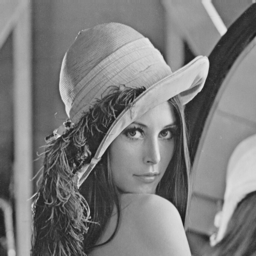

In [6]:
from PIL import Image
import numpy as np

# Todo: 讀檔，確定影像大小
img = Image.open("input/lena.bmp")
img = np.array(img)
print("image shape:", img.shape)
show = Image.fromarray(img).resize((256,256))
show

In [2]:
######## My solutions ########
######## alanhc 2021 ########

# Functions
### flipV: 上下翻轉
### flipH: 左右翻轉
### flip_diagonally: 左右翻轉
# explanation
### ans array->答案陣列

# Todo: 把最下面的row翻上去
# Algorithm:
### 1. 建立ans array
### 2. 建立把最下面(h-i-1)的row翻上去第i個row
def flip_V(img):
    h, w = img.shape
    ans = np.zeros((h,w), np.uint8)  # Algorithm step 1
    for i in range(h):
        ans[i,:]=img[h-i-1,:] # Algorithm step 2
    return ans

# Todo: 把最右邊的col翻到最左邊
# Algorithm:
### 1. 建立ans array
### 2. 建立把最右邊面(h-i-1)個翻上去第i個row
def flip_H(img):
    h, w = img.shape
    ans = np.zeros((h,w), np.uint8) # Algorithm step 1
    for i in range(w):
        ans[:,i]=img[:,w-i-1]
    return ans

# Todo: 把pixel按照對角線翻轉
# Algorithm:
### 1. 求Matrix的 transpose
def flip_diagonally(ans):
    return ans.T # Algorithm step 1


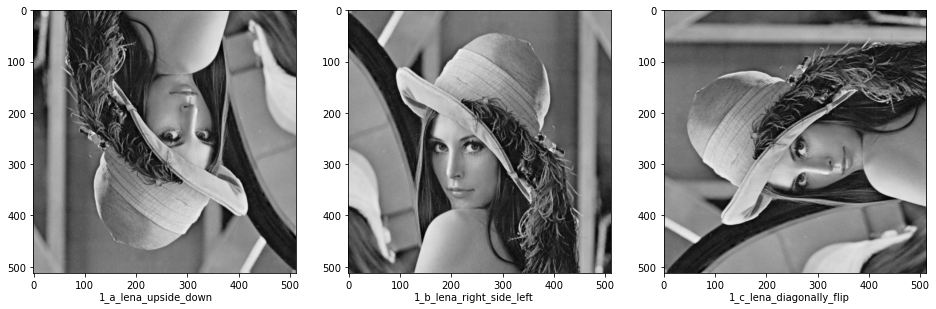

In [3]:
### 參考 My solutions ####
### 一次檢視 ###
import matplotlib.pyplot as plt
process_Fs = [flip_V, flip_H, flip_diagonally]
names = ["1_a_lena_upside_down", "1_b_lena_right_side_left", "1_c_lena_diagonally_flip"]
plt.figure(figsize=(16,16))
for i in range(len(process_Fs)):
    p = plt.subplot(1, len(process_Fs), i+1)
    plt.imshow( process_Fs[i](img) , cmap="gray")
    plt.text(0.25, -0.1, names[i],  transform=p.transAxes)

## Part2. Write a program or use software to do the following requirement.
- (a) rotate lena.bmp 45 degrees clockwise (原本Part2-(d))
- (b) shrink lena.bmp in half (原本Part2-(e))
- (c) binarize lena.bmp at 128 to get a binary image (原本Part2-(f))

### Software usage: [GIMP](https://www.gimp.org)
操作步驟：
- 2.a 選擇  Layer>Transform>Artibrary Rotation...> set Angle to 45
- 2.b 選擇  Tools>Transform tools>Scale.> set Width to 256, Height to 256
- 2.c 選擇  Colors>Thresholds> set value to 128

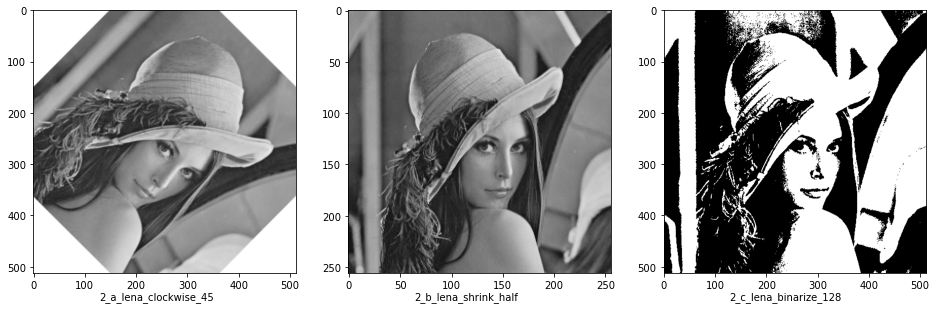

In [4]:
### 參考 My solutions ####
### 一次檢視 ###
import matplotlib.pyplot as plt
filenames = ["2_a_lena_clockwise_45", "2_b_lena_shrink_half", "2_c_lena_binarize_128"]
plt.figure(figsize=(16,16))
for i in range(len(filenames)):
    p = plt.subplot(1, len(filenames), i+1)
    plt.imshow( Image.open("output/"+filenames[i]+".PNG") , cmap="gray")
    plt.text(0.25, -0.1, filenames[i],  transform=p.transAxes)

## 補充
另一種上下顛倒實作
把所有的pixel反過來，參考 Reference > 2. [stackoverflow]-how-to-flip-image-with-opencv-and-python-without-cv2-flip
```python
img_upside_down = img[::-1] 
```

## Reference

1. https://www.geeksforgeeks.org/image-processing-in-python-scaling-rotating-shifting-and-edge-detection/
2. https://stackoverflow.com/questions/51342774/how-to-flip-image-with-opencv-and-python-without-cv2-flip
3. https://docs.gimp.org/2.10/en/gimp-layer-rotate-90.html
4. https://docs.gimp.org/2.2/en/gimp-tool-crop.html
5. https://guides.lib.umich.edu/c.php?g=282942&p=1888162
6. https://docs.gimp.org/2.10/en/gimp-tool-threshold.html
7. https://docs.gimp.org/2.10/en/gimp-tool-threshold.html





In [ ]:
# 存檔用
img_diagonally= Image.fromarray( flip_diagonally(img) )
img_h = Image.fromarray( flip_H(img) )
img_v = Image.fromarray( flip_V(img) )
img_diagonally.save("output/lena_diagonally_flip.bmp")
img_h.save("output/lena_right_side_left.bmp")
img_v.save("output/lena_upside_down.bmp")

In [ ]:
### 參考 My solutions ####
### 把前面 “#” 拿掉 可直接執行 ###
### 檢視原始圖檔請到 output/ ###

#show = Image.fromarray(img)
show = Image.fromarray(flip_V(img))  # 1-a
#show = Image.fromarray(flip_H(img)) # 1-b
#show = Image.fromarray(flip_diagonally(img)) # 1-c
show